## Read Libraries

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [2]:
conda install -c conda-forge matplotlib


Retrieving notices: ...working... done
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\nasef\anaconda3\envs\tf-gpu

  added / updated specs:
    - matplotlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    brotli-1.0.9               |       h8ffe710_7          18 KB  conda-forge
    brotli-bin-1.0.9           |       h8ffe710_7          21 KB  conda-forge
    cycler-0.11.0              |     pyhd8ed1ab_0          10 KB  conda-forge
    freetype-2.10.4            |       h546665d_1         489 KB  conda-forge
    kiwisolver-1.4.4           |   py39h2e07f2f_0          61 KB  conda-forge
    libbrotlicommon-1.0.9      |       h8ffe710_7          67 KB  conda-forge
    libbrotlidec-1.0.9         |       h8ffe710_7          33 KB  conda-forge
    libbrotlienc-1.0.9         |       h8ffe710_7         716 KB  conda-forge
    libclang-11.1.0       


















qt-5.12.9            | 106.1 MB  | 6          |   6% 
libclang-11.1.0      | 20.8 MB   | #1         |  11% 


















qt-5.12.9            | 106.1 MB  | 6          |   6% 















pyqt-5.12.3          | 4.8 MB    | ###4       |  34% 


















qt-5.12.9            | 106.1 MB  | 6          |   6% 
libclang-11.1.0      | 20.8 MB   | #1         |  11% 















pyqt-5.12.3          | 4.8 MB    | ###4       |  34% 


















qt-5.12.9            | 106.1 MB  | 6          |   6% 
libclang-11.1.0      | 20.8 MB   | #1         |  11% 















pyqt-5.12.3          | 4.8 MB    | ###4       |  35% 


















qt-5.12.9            | 106.1 MB  | 6          |   6% 
libclang-11.1.0      | 20.8 MB   | #1         |  11% 


















qt-5.12.9            | 106.1 MB  | 6          |   7% 















pyqt-5.12.3          | 4.8 MB    | ###4       |  35% 
libclang-11.1.0      | 20.8 MB   | #1         |  11% 


















qt-5.

# Proccesing Data

In [4]:
(X_train, y_train),(X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [5]:

X_train = np.array(X_train, dtype='float')/255.0 # norm to [0,1]
y_train = np.array(y_train, dtype='short')
X_test = np.array(X_test, dtype='float')/255.0 # norm to [0,1]
y_test = np.array(y_test, dtype='short')

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [6]:




#reshape each input vector (784) into a 28*28*1 image 
X_train = np.reshape(X_train, (-1,32,32,3)) 
X_test = np.reshape(X_test, (-1,32,32,3))

# convert MNIST labels into 10-D one-hot vectors - upper-case label y
Y_train = np.zeros((y_train.size, y_train.max()+1))
Y_train[np.arange(y_train.size),y_train] = 1
Y_test = np.zeros((y_test.size, y_test.max()+1))
Y_test[np.arange(y_test.size),y_test] = 1

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, Y_train.shape, Y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1) (50000, 10) (10000, 10)


## CNN Model

Build the model

In [8]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras

tf.random.set_seed(42)
np.random.seed(42)

# define the model structure using Keras
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', \
                        padding='same', input_shape=[32, 32, 3]),
    keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),

    keras.layers.Dense(units=512, activation='relu'),
    keras.layers.Dense(units=256, activation='relu'),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax'),
])

# compile model by attaching with loss/optimizer/metric
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='adam',
              metrics=["accuracy"])

# learning a model
history = model.fit(X_train, y_train, epochs=15,
                    validation_data=(X_test, y_test))

Epoch 1/15
1563/1563 [==============================] - 68s 38ms/step - loss: 1.8046 - accuracy: 0.3030 - val_loss: 1.4679 - val_accuracy: 0.4535
Epoch 2/15
1563/1563 [==============================] - 73s 46ms/step - loss: 1.2877 - accuracy: 0.5320 - val_loss: 1.1312 - val_accuracy: 0.5961
Epoch 3/15
1563/1563 [==============================] - 75s 48ms/step - loss: 1.0545 - accuracy: 0.6245 - val_loss: 0.9901 - val_accuracy: 0.6541
Epoch 4/15
1563/1563 [==============================] - 66s 42ms/step - loss: 0.9054 - accuracy: 0.6794 - val_loss: 0.9171 - val_accuracy: 0.6774
Epoch 5/15
1563/1563 [==============================] - 64s 41ms/step - loss: 0.7910 - accuracy: 0.7225 - val_loss: 0.8478 - val_accuracy: 0.7042
Epoch 6/15
1563/1563 [==============================] - 65s 41ms/step - loss: 0.7060 - accuracy: 0.7516 - val_loss: 0.9529 - val_accuracy: 0.6968
Epoch 7/15
1563/1563 [==============================] - 60s 39ms/step - loss: 0.6401 - accuracy: 0.7777 - val_loss: 0.8717 -

Give A Breif report to know which categorey was harder to train

In [12]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np 

y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(element)for element in y_pred]

print("Your report Sir:  \n",classification_report(y_test,y_pred_classes))

ModuleNotFoundError: No module named 'sklearn'

In [13]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


Get a summery about the model (e,g number parameteres)

In [14]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 128)         7

Learning Curves for the Model

In [15]:
# show the learning curves 
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

ModuleNotFoundError: No module named 'pandas'

## Examine the model

Assign categories to their names

In [ ]:
classes =["Airplane",'Car','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']

In [ ]:
y_train = y_train.reshape(-1,)

In [ ]:
classes[7]

Build plot for exicting data

In [ ]:
def plot_sample (X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.title("Actual Image", size=28,fontweight="bold")
  plt.xlabel(classes[y[index]],size=20)

In [ ]:
plot_sample(X_train,y_train,2000)

In [60]:
y_test = y_test.reshape(-1,)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=int16)

In [61]:
y_pred= model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [62]:
y_classes = [np.argmax(element)for element in y_pred]

Buld a plot for predicted data

In [90]:
def plot_pred (X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.title("Predicted Image", size=28,fontweight="bold")
  plt.xlabel(classes[y_classes[index]],size=20)

Now give the function you image number 

Here we did 3 samples 

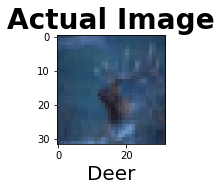

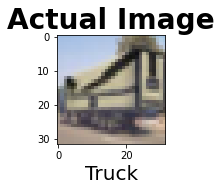

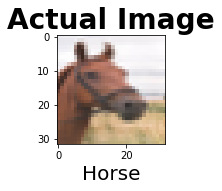

In [95]:
plot_sample(X_test,y_test,22)
plot_sample(X_test,y_test,76)
plot_sample(X_test,y_test,99)

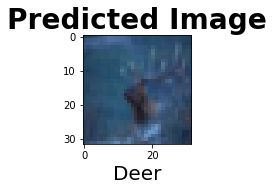

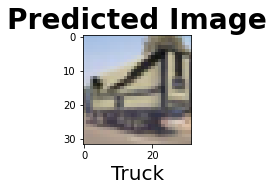

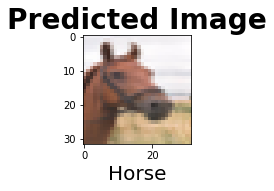

In [96]:
plot_pred(X_test,y_test,22)
plot_pred(X_test,y_test,76)
plot_pred(X_test,y_test,99)

In [56]:
con